### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_blobs, make_moons

### Sigmoid is classification fonction

In [2]:
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))

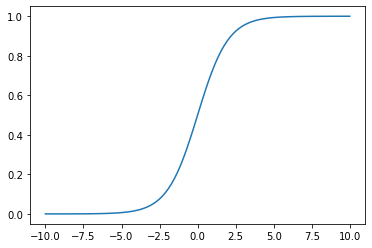

In [3]:
X=np.linspace(-10,10,100)
y= sigmoid(X)
plt.plot(X,y)

In [4]:
def sigmoid(X1, X2):
    # X1= ağırlık
    # X2 = çap
    b0 = -6 # intercept değeri
    b1 = 0.02
    b2 = 0.8
    Linear = b0 + b1*X1 + b2*X2
    return (1 / (1+ np.exp(-Linear)))

In [5]:
X1 = 60
X2 = 8
y_pred = sigmoid(X1, X2)
y_pred

0.8320183851339246

In [6]:
-np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)

array([1.7838281 , 1.78381184, 1.78379194, 1.78376759, 1.78373778,
       1.78370131, 1.78365666, 1.78360203, 1.78353517, 1.78345336,
       1.78335323, 1.78323071, 1.78308079, 1.78289734, 1.78267288,
       1.78239825, 1.78206227, 1.78165127, 1.78114854, 1.78053369,
       1.77978184, 1.77886264, 1.77773909, 1.77636616, 1.77468908,
       1.77264136, 1.77014236, 1.76709459, 1.7633804 , 1.75885836,
       1.75335907, 1.74668068, 1.73858413, 1.72878843, 1.71696644,
       1.70274176, 1.68568777, 1.66532996, 1.64115344, 1.61261731,
       1.57917801, 1.54032342, 1.49561819, 1.44475941, 1.38763866,
       1.3244033 , 1.25550645, 1.18173351, 1.10419375, 1.02427046,
       0.94353102, 0.86360773, 0.78606797, 0.71229503, 0.64339818,
       0.58016282, 0.52304208, 0.47218329, 0.42747806, 0.38862347,
       0.35518417, 0.32664804, 0.30247152, 0.28211371, 0.26505972,
       0.25083504, 0.23901305, 0.22921735, 0.2211208 , 0.21444241,
       0.20894312, 0.20442108, 0.20070689, 0.19765912, 0.19516

In [7]:
-np.log(0.12)

2.120263536200091

In [8]:
-np.log(0)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


inf

In [9]:
-np.log(0.12)

2.120263536200091

In [10]:
def loss(y, y_pred): # calculating loss func
    return -np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)

In [11]:
loss(1, 0)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


inf

In [12]:
loss(1, 0.88)

0.12783337150988489

In [13]:
y_pred= np.linspace(0.01, 0.99, 100)

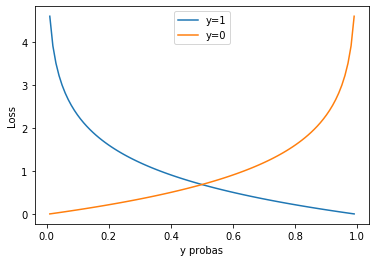

In [14]:
plt.plot(y_pred, loss(1, y_pred), label= "y=1")
plt.plot(y_pred, loss(0, y_pred), label= "y=0")
plt.xlabel("y probas")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
import numpy as np
from warnings import warn
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))


class Logistic:
    def __init__(self, fit_intercept=True, cozum="Gradient", lr=0.01, tol=10**-6, max_iter=10000, lamda=0.0, verbose=1):
        self.fit_intercept = fit_intercept
        self.cozum = cozum
        self.b = None
        self.lr=lr
        self.tol=tol
        self.max_iter=max_iter
        self.lamda=lamda
        self.verbose = verbose
    def __repr__(self):
        return f"Linear(cozum={self.cozum},lr={self.lr})"
    
    def gradient(self, X, y):
        """Calculate gradients for coefficients at a given point."""
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if self.b.shape[0] != X.shape[1]:
            X = self._add_ones(X)
        y_pred = sigmoid(X @ self.b)
        dy_pred  = (-y / y_pred) - (-1 / (1-y_pred)) * (1-y)
        dz = y_pred * (1-y_pred)
        dw = X.T
        gradient = dw @(dy_pred * dz)
        return gradient

    def katsayi(self, X,y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if self.cozum == 'Normal':
            self._normal(X, y)
        elif self.cozum == 'Gradient':
            self._gradient(X, y)
        else:
            raise ValueError('Gecersiz cozum yontemi.')
        return self
    
    def _add_ones(self, X):
        if self.fit_intercept:
            birler = np.ones((X.shape[0], 1))
            X = np.hstack([birler, X])
        return X
    
    
    def fit(self, X,y):
        return self.katsayi(X,y)
    
    def _gradient(self, X, y, normalize=False):
        X = self._add_ones(X)
        b = np.random.randn(X.shape[1], y.shape[1])
        for iter_ in range(self.max_iter):
            y_pred = sigmoid(X @ b)  # feed_forward
            y_pred = np.clip(y_pred, 1e-9, 1. - 1e-9)
            L = -np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)
            if iter_ % 100 == 0 and self.verbose:
                print(L.sum())
            #print("L shape= ", L.shape) 
            dy_pred  = (-y / y_pred) - (-1 / (1-y_pred)) * (1-y)
            dz = y_pred * (1-y_pred)
            dw = X.T
            gradient = dw @(dy_pred * dz)
            #print(gradient.shape)
            #dw @ ((-y / y_pred) - (-1 / 1-y_pred) * (1-y)) *( y_pred * (1-y_pred))
            regterm=(2 * self.lamda * b)
            dw = gradient +  regterm  # back_propogation
            
            
            if np.isnan(dw).any():
                import pdb; pdb.set_trace()
            
            b = b - self.lr * (dw / X.shape[0])
            is_converged = (np.abs(dw) < self.tol).all()
            if is_converged:
                break
        if not is_converged:
            print('Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.')
        self.b = b

    def tahmin_et(self, X):
        if self.fit_intercept:
            birler = np.ones((X.shape[0],1))
            X= np.hstack([birler , X])
        
        y_pred= sigmoid(X @ self.b)
        return y_pred
    
    def predict(self, X):
        return self.tahmin_et(X)
    
    def score(self, X, y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        y_pred = self.predict(X)
        return np.mean(y == (y_pred >= 0.5))
    

In [67]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=500)

In [68]:
X.shape

(500, 20)

In [69]:
y= y.reshape(-1,1)
y.shape

(500, 1)

In [70]:
classifier = Logistic(cozum= "Gradient", lr=0.1, max_iter=10000, verbose=1)
classifier.fit(X,y)
y_pred = classifier.predict(X)
classifier.score(X,y)

594.3977529741804
186.36221605883225
153.26219307525815
145.72916274323197
143.56268118187398
142.92325522101424
142.73572633177545
142.68072590595463
142.6644774824366
142.65962806912646
142.6581653140658
142.65771968977586
142.65758271369958
142.65754027647586
142.65752703729228
142.65752288168375
142.65752157012693
142.6575211541047
142.6575210215176
142.65752097906525
142.65752096540814
142.6575209609924
142.6575209595568
142.65752095908718
142.65752095893248
142.6575209588811
142.65752095886387
142.65752095885802
142.65752095885603
142.65752095885534
142.65752095885512


0.882

In [20]:
clasi = LogisticRegression()
clasi.fit(X,y)
clasi.predict(X)
clasi.score(X,y)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.922

In [21]:
import numpy as np
from warnings import warn
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))


class MultiLogistic(Logistic): # Logistic inherit ettiğimiz için aşağıdaki metodları tekrar kullanmaya gerek yok.
    
    def __init__(self, fit_intercept=True, cozum="Gradient", lr=0.01, tol=10**-6, max_iter=10000, lamda=0.0, verbose=0):
        self.models = []
        self.fit_intercept = fit_intercept
        self.cozum = cozum
        self.b = None
        self.lr=lr
        self.tol=tol
        self.max_iter=max_iter
        self.lamda=lamda
        self.verbose = verbose

    def get_params(self, deep=True):
        param = ["fit_intercept","cozum","lr","tol","max_iter","lamda", "verbose"]
        return {p:getattr(self,p) for p in param}
        
    def __repr__(self):
        return f"Logistic(cozum={self.cozum},lr={self.lr})"

    def katsayi(self, X,y):
        encoded = (y == sorted(set(y.ravel()))).astype(int)
        for col in encoded.T:
            model = Logistic(**self.get_params())
            model.fit(X,col.reshape(-1,1))
            self.models.append(model)
        return self
        
#     def fit(self, X,y):
#         return self.katsayi(X,y)

    def tahmin_et(self, X):
        kolonlar = self.predict_proba(X)
        return kolonlar.argmax(axis=1)
    
#     def predict(self, X):
#         return self.tahmin_et(X)
    
    def predict_proba(self,X):
        kolonlar = []
        for model in self.models:
            y_pred_c = model.predict(X)
            kolonlar.append(y_pred_c.ravel())
        kolonlar = np.array(kolonlar).T
        return np.exp(kolonlar)/np.exp(kolonlar).sum(axis=1,keepdims=True)        
        
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y.ravel() == (y_pred.ravel()))

# Example:

In [22]:
X, y = make_blobs(centers=4,random_state=42)

In [23]:
model = MultiLogistic(cozum="Gradient", lr=0.1, verbose=0)

In [24]:
model.fit(X,y.reshape(-1,1))

Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.
Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.
Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.
Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.


Logistic(cozum=Gradient,lr=0.1)

In [25]:
model.tahmin_et(X)

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1], dtype=int64)

In [26]:
model.score(X,y)

1.0

In [27]:
model.predict_proba(X)[0:5,:]

array([[0.17536293, 0.17535073, 0.17580494, 0.4734814 ],
       [0.17486291, 0.17486291, 0.47532667, 0.17494751],
       [0.47191663, 0.1744828 , 0.17448186, 0.17911872],
       [0.1748723 , 0.17487232, 0.4753522 , 0.17490319],
       [0.17958156, 0.17542592, 0.17542606, 0.46956646]])

In [28]:
model.get_params()

{'fit_intercept': True,
 'cozum': 'Gradient',
 'lr': 0.1,
 'tol': 1e-06,
 'max_iter': 10000,
 'lamda': 0.0,
 'verbose': 0}

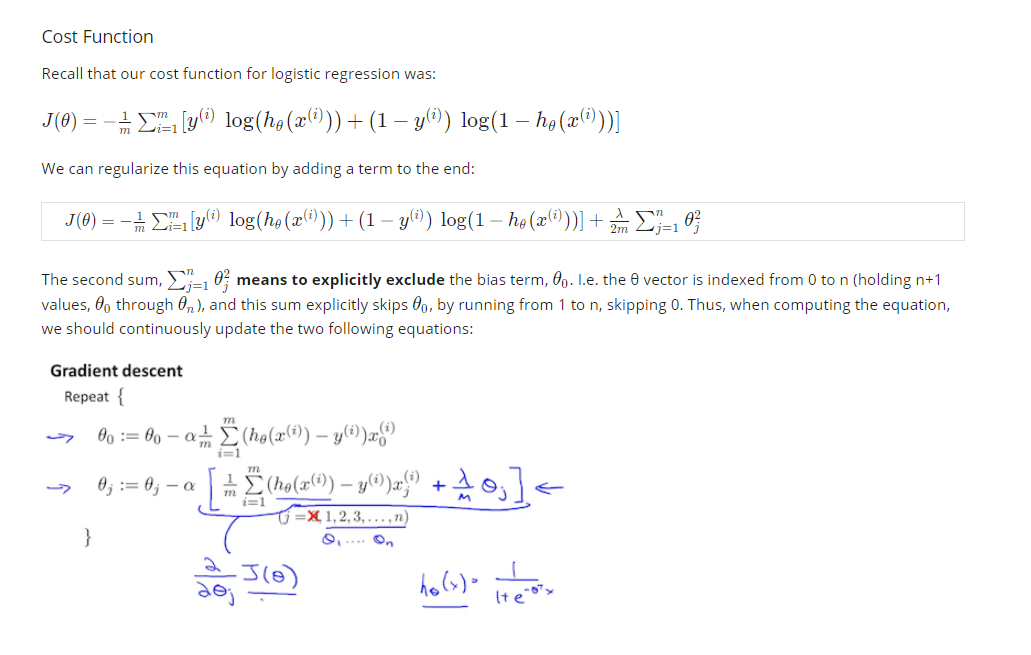

In [71]:
X, y = make_moons(noise=0.15,random_state=42)

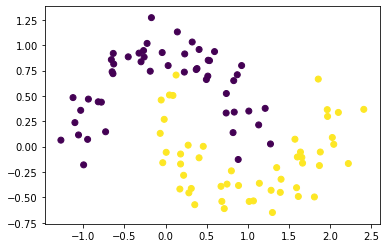

In [72]:
plt.scatter(*X.T, c=y)

## Bizim model ile skor

In [74]:
Logistic(cozum="Gradient", verbose=0, lr=0.1).fit(X,y.reshape(-1,1)).score(X, y.reshape(-1,1))

Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.


0.86

## Bizim model ile Polynomial dönüştürücüsü kullanılarak

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
model = Logistic(cozum="Gradient",lr=1, verbose=0, max_iter=2000)

In [77]:
transformator = PolynomialFeatures(degree=8, include_bias=False)

In [78]:
Xt = transformator.fit_transform(X)

In [79]:
Xt.shape

(100, 44)

In [82]:
model.fit(Xt, y.reshape(-1,1))

Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.


Linear(cozum=Gradient,lr=1)

In [83]:
model.score(Xt, y)

0.99

## Contourplot

In [84]:
X1 = np.linspace(X.T[0].min()-1,X.T[0].max()+1,100)
X2 = np.linspace(X.T[1].min()-1,X.T[1].max()+1,100)

In [85]:
X11, X22 = np.meshgrid(X1,X2)

In [86]:
X11.shape

(100, 100)

In [87]:
np.hstack([X11.reshape(-1,1),X22.reshape(-1,1)]).shape

(10000, 2)

In [88]:
Xc = np.hstack([X11.reshape(-1,1),X22.reshape(-1,1)])

In [89]:
Xp = transformator.transform(Xc)

In [90]:
ZZ = model.predict(Xp).reshape(100,100)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


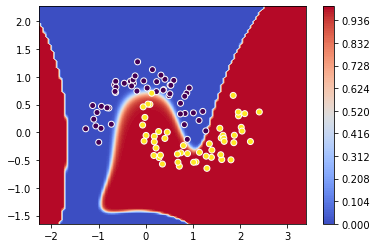

In [91]:
plt.contourf(X11,X22,ZZ,levels=139,cmap="coolwarm")
plt.colorbar()
plt.scatter(*X.T, c=y, edgecolors="white")

In [47]:
from ipywidgets import interact

In [93]:
@interact(lamda=(-5,5,1),lr=(-8,0))
def reg(lamda=-5,lr=-1):
    model = Logistic(cozum="Gradient", lr=2**lr, max_iter=4000, lamda=2**lamda, verbose=0)
    model.fit(Xt, y.reshape(-1,1))
    print(model.score(Xt,y.reshape(-1,1)))
    ZZ = model.predict(Xp).reshape(100,100)
    plt.contourf(X11,X22,ZZ,levels=139,cmap="coolwarm")
    plt.colorbar()
    plt.scatter(*X.T, c=y, edgecolors="white")

interactive(children=(IntSlider(value=-5, description='lamda', max=5, min=-5), IntSlider(value=-1, description…

# Sklearn ile çözüm

In [49]:
@interact(c=(-4,4,1))
def reg(c=0):
    model = LogisticRegression(C=10**c, solver='lbfgs')
    model.fit(Xt, y)
    print(model.score(Xt,y))
    ZZ = model.predict_proba(Xp)[:,1].reshape(100,100)
    plt.contourf(X11,X22,ZZ,levels=139,cmap="coolwarm",vmin=0,vmax=1)
    plt.colorbar()
    plt.scatter(*X.T, c=y, edgecolors="white")
    # sklearn deki C katsayısı bizim model ile ters çalışıyor. C azaldıkça reg artıyor, underfit e gidiyor.

interactive(children=(IntSlider(value=0, description='c', max=4, min=-4), Output()), _dom_classes=('widget-int…

In [50]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

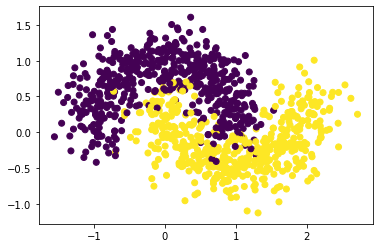

In [51]:
plt.scatter(*X.T, c=y)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
@interact(c=(-4,4,1))
def reg(c=0):
    model = LogisticRegression(C=10**c, solver='lbfgs', max_iter=500)
    transformator = PolynomialFeatures(degree=9, include_bias=False)
    X_tr = transformator.fit_transform(X_train)
    model.fit(X_tr, y_train)
    print(model.score(X_tr,y_train))
    X_tt = transformator.transform(X_test)
    print(model.score(X_tt,y_test))
    

#     plt.contourf(X11,X22,ZZ,levels=139,cmap="coolwarm",vmin=0,vmax=1)
#     plt.colorbar()
#     plt.scatter(*X.T, c=y, edgecolors="white")
#     # sklearn deki C katsayısı bizim model ile ters çalışıyor. C azaldıkça reg artıyor, underfit e gidiyor.

interactive(children=(IntSlider(value=0, description='c', max=4, min=-4), Output()), _dom_classes=('widget-int…

## Cross_validate ile çözüm

In [55]:
model2 = LogisticRegression()

_=cross_validate(model2,X_train,y_train,return_train_score=True,cv=10)

In [56]:
X, y = make_blobs(n_features=27, n_samples=100, centers=2, cluster_std=19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
@interact(c=(-4,4,1))
def reg(c=0):
    model = LogisticRegression(C=10**c,max_iter=1000, solver='lbfgs')
#     transformator = PolynomialFeatures(degree=9, include_bias=False)
#     X_tr = transformator.fit_transform(X_train)
    crs_v = cross_validate(model,X_train,y_train,return_train_score=True,cv=10)
    print(crs_v["train_score"].mean())
    print(crs_v["test_score"].mean())
    print(crs_v["train_score"].mean()-crs_v["test_score"].mean())

#     model.fit(X_tr, y_train)
#     print(model.score(X_tr,y_train))
#     X_tt = transformator.transform(X_test)
#     print(model.score(X_tt,y_test))

interactive(children=(IntSlider(value=0, description='c', max=4, min=-4), Output()), _dom_classes=('widget-int…

# Kenar Çözümler / Örnekler

In [58]:
a = [0.15, 0.23, 0.81]

In [59]:
np.exp(a)/np.exp(a).sum() # softmax

array([0.24887512, 0.2696032 , 0.48152168])

In [60]:
a/np.sum(a)

array([0.12605042, 0.19327731, 0.68067227])

In [61]:
a = [[0.15, 0.23, 0.81], [0.15, 0.23, 0.81]]

In [62]:
np.exp(a)/np.exp(a).sum(axis=1,keepdims=True)

array([[0.24887512, 0.2696032 , 0.48152168],
       [0.24887512, 0.2696032 , 0.48152168]])

In [63]:
y = np.random.randint(0,3,size=(10,1))

In [64]:
y

array([[2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [65]:
(y == sorted(set(y.ravel()))).astype(int)

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])